# Programming tasks: part 13

Required datasets: `s1.csv`, `jain.csv`, `iris.csv`.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN

## Task 1
Load `s1.csv` containig artificially generated data.

In [3]:
url = 's1.csv'
dataframe = pd.read_csv(url,header = 0)
data = dataframe.values
X = StandardScaler().fit_transform(data)

### a. Visualise the data.

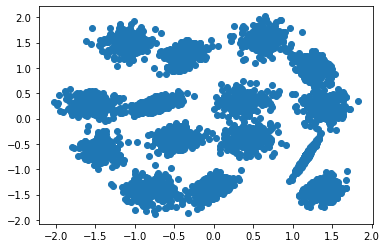

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.show()

### b. Fit a k-means method. Using the visualisation from the previous step propose a number of clusters. Visualise the resulting split.

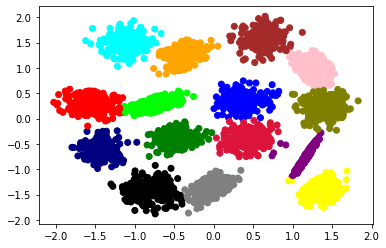

In [6]:
clus1 = KMeans(n_clusters=15)
pred1 = clus1.fit_predict(X)
colormap = np.array(['blue','red','green','yellow','orange','black','pink','cyan',
                     'brown','purple','lime','gray','navy','crimson','olive'])
plt.scatter(X[:,0],X[:,1],c = colormap[pred1])

We can see that some points which should have been in the purple cluster are in the yellow one. We might want to try and improve this method.

### c. Fit a hierarchical clustering method with a single and complete linkage function.

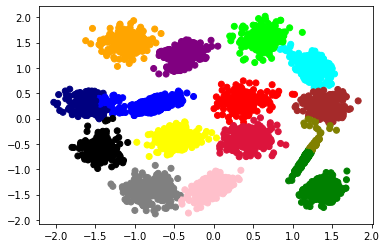

In [8]:
clus2 = AgglomerativeClustering(n_clusters=None,linkage = 'complete',distance_threshold=1.23)
pred2 = clus2.fit_predict(X)
colormap = np.array(['blue','red','green','yellow','orange','black','pink','cyan',
                     'brown','purple','lime','gray','navy','crimson','olive'])
plt.scatter(X[:,0],X[:,1],c = colormap[pred2])
plt.show()

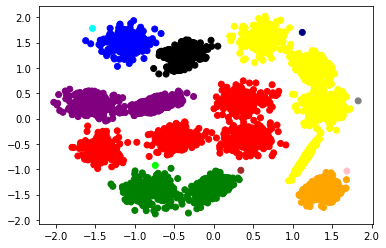

In [9]:
clus3 = AgglomerativeClustering(n_clusters=None,linkage = 'single',distance_threshold=0.15)
pred3 = clus3.fit_predict(X)
colormap = np.array(['blue','red','green','yellow','orange','black','pink','cyan',
                     'brown','purple','lime','gray','navy','crimson','olive'])
plt.scatter(X[:,0],X[:,1],c = colormap[pred3])
plt.show()

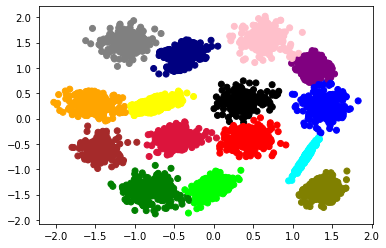

In [10]:
clus4 = AgglomerativeClustering(n_clusters=None,distance_threshold=4)
pred4 = clus4.fit_predict(X)
colormap = np.array(['blue','red','green','yellow','orange','black','pink','cyan',
                     'brown','purple','lime','gray','navy','crimson','olive'])
plt.scatter(X[:,0],X[:,1],c = colormap[pred4])
plt.show()

So far this method works best. Some points from the purple cluster have arguably been missclassified as pink.

### d. Using a tree find the optimal number of clusters for both models from the previous step. Visualise the split. Which one of the two methods gives the better results.

In [11]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

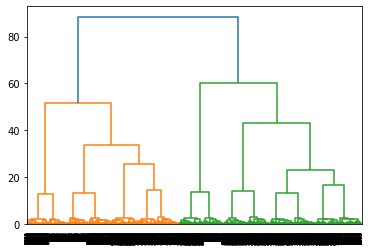

In [12]:
plot_dendrogram(clus4, truncate_mode="level")

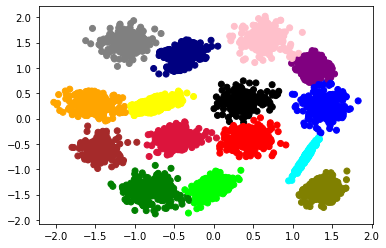

In [13]:
clus5 = AgglomerativeClustering(n_clusters=15) # we use the numbers of clusters found using the dendrogram
pred5 = clus5.fit_predict(X)
colormap = np.array(['blue','red','green','yellow','orange','black','pink','cyan',
                     'brown','purple','lime','gray','navy','crimson','olive'])
plt.scatter(X[:,0],X[:,1],c = colormap[pred5])
plt.show()

## Task 2

Load `jain.csv`containig artificially generated, 2-dimensional data.

## a. Visualise the data in the first two columns.

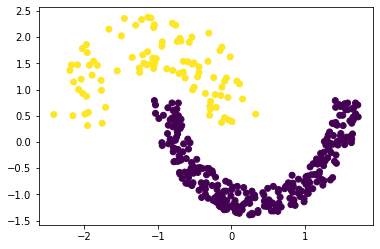

In [14]:
url = 'jain.csv'
dataframe = pd.read_csv(url,header = 0)
data = dataframe.values
X,y = data[:,:-1],data[:,-1]
y = LabelEncoder().fit_transform(y.astype("str"))
X = StandardScaler().fit_transform(X)
plt.scatter(X[:,0],X[:,1],c = y)

## b. Use a k-means algorithm with 2 clusters. Visualise the split into clusters. Does the method work well? Compare the results to the actual numbers of clusters.

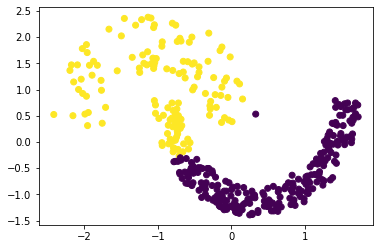

In [16]:
clus1 = KMeans(n_clusters=2)
pred1 = clus1.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c = pred1)
plt.show()

### c. Repeat the previous step using DBSCAN algorithm. Which methods gives the better results?

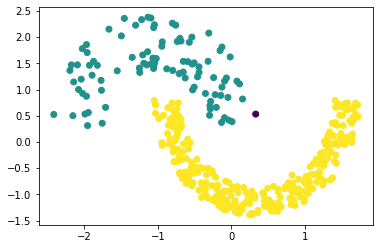

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

In [17]:
clus2 = DBSCAN(eps = 0.315,min_samples=3)
pred2 = clus2.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c = pred2)
plt.show()
print(pred2)

We can see that DBSCAN gives us pretty good results. Only one point has been wrongly classified as an outlier.

## Task 3

Load `iris.csv`.

In [18]:
url = 'iris.csv'
dataframe = pd.read_csv(url,header = 0)
data = dataframe.values
X,y = data[:,:-1],data[:,-1]
y = LabelEncoder().fit_transform(y.astype("str"))
X = StandardScaler().fit_transform(X)

### a. Fit a k-means clustering method using 3 clusters and calculate accuracy.

In [20]:
clus1 = KMeans(n_clusters=3)
pred1 = clus1.fit_predict(X)
print(pred1)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [21]:
pred1 = -pred1-1
for j in range(3):
  which_num = -1
  suma = -1
  for i in range(3):
    suma_cz = np.sum(y[pred1==-j-1]==i)
    if suma_cz>suma:
      suma = suma_cz
      which_num=i
  pred1[pred1==-j-1] = which_num

In [22]:
np.mean(pred1==y)

0.8333333333333334

### b. Fit an affinity propagation method and calculate accuracy.

In [23]:
clus2 = AffinityPropagation(damping = 0.982,convergence_iter=10)
pred2 = clus2.fit_predict(X)
print(pred2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [24]:
pred2 = -pred2-1
for j in range(3):
  which_num = -1
  suma = -1
  for i in range(3):
    suma_cz = np.sum(y[pred2==-j-1]==i)
    if suma_cz>suma:
      suma = suma_cz
      which_num=i
  pred2[pred2==-j-1] = which_num

In [25]:
np.mean(pred2==y)

0.88